In [78]:
#MTA project 1 EDA
#SDAIA Academy
#Rawan Al-Ahmadi

In [1]:
import os 
import pandas as pd
import numpy as np
import glob as gg
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine
import sqlite3
from difflib import SequenceMatcher
import re
import datetime as dt
%matplotlib inline

# Loading data:

In [2]:
#path to my files for the monthes of 6,7,8,9 of 2019 
Path_csv = "/Users/rawan/Desktop/MyProject1/data"

Csv_all =gg.glob(Path_csv + "/*.txt")
list_of_allcsv= []# all data in will be added to the list

for i in Csv_all:
    df = pd.read_csv(i)
    list_of_allcsv.append(df)

In [3]:
mta_all_files= pd.concat(list_of_allcsv)#all files togther

In [4]:
mta_all_files.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


# connecting to the data base:

In [5]:
engine = create_engine("sqlite:///C:/Users/rawan/Desktop/MyProject1/MyData1.db", echo= False)
conn = sqlite3.connect("C:///Users//rawan//Desktop//MyProject1//MyData1.db")

In [6]:
x = pd.read_sql("SELECT * FROM allfiles limit 30;", conn)
x

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,7072639,2396608
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,7072662,2396613
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,7072673,2396619
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,7072746,2396665


Checking the Data:

In [7]:
mta_all_files.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')



"Each compination of C/A, UNIT, SCP, and STATION represents a unique turnstile.
Where:
- C/A: Control Area.
- UNIT: Remote Unit for a station.
- SCP: Subunit Channel Position represents an specific address for a device.
- STATION: Represents the station name the device is located at.

- Date is recorded every 4 hours, and the ENTRIES and EXITS columns are cumulative."



In [8]:
mta_all_files.tail()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205331,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,05:00:00,REGULAR,5554,420
205332,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,09:00:00,REGULAR,5554,420
205333,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,13:00:00,REGULAR,5554,420
205334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,17:00:00,REGULAR,5554,420
205335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,21:00:00,REGULAR,5554,420


In [9]:
mta_all_files.shape

(3714064, 11)

In [10]:
mta_all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3714064 entries, 0 to 205335
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [11]:
mta_all_files.describe()

,ENTRIES,EXITS
count,3.714064e+06,3.714064e+06
mean,4.219184e+07,3.466461e+07
std,2.151177e+08,1.982552e+08
min,0.000000e+00,0.000000e+00
25%,2.893640e+05,1.197578e+05
50%,2.087000e+06,1.194266e+06
75%,6.677386e+06,4.581015e+06
max,2.129289e+09,2.124055e+09


# Cleaning the data:

In [12]:
#checking the number of duplicates in the MTA data

mta_all_files.shape
duplicate_number= mta_all_files[mta_all_files.duplicated()]
print("The number of duplicated rows are:", duplicate_number.shape)

The number of duplicated rows are: (0, 11)


In [13]:
#cleaning the white space from columns names

mta_all_files.columns = mta_all_files.columns.str.strip()

In [14]:
#Making a Date_Time column

mta_all_files['Date_Time'] = pd.to_datetime((mta_all_files.DATE + ' ' + mta_all_files.TIME), format='%m/%d/%Y %H:%M:%S')

In [15]:
mta_all_files.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,2019-05-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415,2019-05-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443,2019-05-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500,2019-05-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555,2019-05-25 16:00:00


In [16]:
#creating a column with the day names 

weekdays_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
mta_all_files['DATE'][1]
mta_all_files['Dayofweek'] = [weekdays_names[dt.datetime.strptime(dstring,'%m/%d/%Y')
                                             .weekday()] for dstring in mta_all_files.DATE.tolist()]

In [17]:
mta_all_files.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Dayofweek
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,2019-05-25 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415,2019-05-25 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443,2019-05-25 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500,2019-05-25 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555,2019-05-25 16:00:00,Saturday


In [18]:
#mask to see if there is any duplicated rows

mask = ((mta_all_files["C/A"] == "A002") &
        (mta_all_files["UNIT"] == "R051") & 
        (mta_all_files["SCP"] == "02-00-00") & 
        (mta_all_files["STATION"] == "59 ST"))

mta_all_files[mask].head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Dayofweek
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,2019-05-25 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415,2019-05-25 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443,2019-05-25 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500,2019-05-25 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555,2019-05-25 16:00:00,Saturday


In [19]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique 

(mta_all_files
 .groupby(["C/A", "UNIT", "SCP", "STATION", "Date_Time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,Date_Time,ENTRIES
2977859,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2
2632964,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,2
93757,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 01:00:00,2
93758,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 05:00:00,2
93759,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 09:00:00,2


In [20]:
# Get rid of the duplicate entry

mta_all_files.sort_values(["C/A", "UNIT", "SCP", "STATION", "Date_Time"], 
                          inplace=True, ascending=False)
mta_all_files.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "Date_Time"], inplace=True)


In [21]:
# sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(mta_all_files
 .groupby(["C/A", "UNIT", "SCP", "STATION", "Date_Time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)


,C/A,UNIT,SCP,STATION,Date_Time,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-05-25 00:00:00,1
2476023,R138,R293,00-03-04,34 ST-PENN STA,2019-07-25 22:00:00,1
2475997,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 14:00:00,1
2475998,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 18:00:00,1
2475999,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 22:00:00,1


# Dealing with DESC column:

In [22]:
mta_all_files.DESC.value_counts()

REGULAR       3698611
RECOVR AUD      15397
Name: DESC, dtype: int64

In [23]:
def remove_RECOVR(mta_all_files):
    mta_all_files = mta_all_files[mta_all_files.DESC == 'REGULAR']
    #Dropping all the rows that are not REGULAR
    return mta_all_files
mta_all_files = remove_RECOVR(mta_all_files)

In [24]:
mta_all_files.DESC.value_counts()

REGULAR    3698611
Name: DESC, dtype: int64

In [25]:
mta_all_files.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Dayofweek
205335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,21:00:00,REGULAR,5554,420,2019-09-27 21:00:00,Friday
205334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,17:00:00,REGULAR,5554,420,2019-09-27 17:00:00,Friday
205333,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,13:00:00,REGULAR,5554,420,2019-09-27 13:00:00,Friday
205332,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,09:00:00,REGULAR,5554,420,2019-09-27 09:00:00,Friday
205331,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,05:00:00,REGULAR,5554,420,2019-09-27 05:00:00,Friday


In [26]:
# Dropping the Desc Column. To prevent errors in multiple run of cell, errors on drop is ignored

mta_all_files = mta_all_files.drop(["DESC"], axis=1, errors="ignore")
mta_all_files.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Date_Time,Dayofweek
205335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,21:00:00,5554,420,2019-09-27 21:00:00,Friday
205334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,17:00:00,5554,420,2019-09-27 17:00:00,Friday
205333,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,13:00:00,5554,420,2019-09-27 13:00:00,Friday
205332,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,09:00:00,5554,420,2019-09-27 09:00:00,Friday
205331,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/27/2019,05:00:00,5554,420,2019-09-27 05:00:00,Friday


# Getting the Maximum value:

In [27]:
mta_daily = (mta_all_files.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE','EXITS'],as_index=False)\
             .ENTRIES.first())
mta_daily.sample(10)

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES
3118240,R612,R057,01-00-00,ATL AV-BARCLAY,09/11/2019,31587,85066
2761687,R317,R408,01-00-00,SIMPSON ST,07/30/2019,1183679,1145642
3153075,R625,R062,01-00-02,CROWN HTS-UTICA,07/20/2019,4453032,5773794
2929858,R513,R093,00-00-00,30 AV,06/19/2019,2748068,481256
430421,D015,R396,00-00-01,AVENUE U,09/03/2019,5519934,5137323
1693190,N545,R204,01-06-00,CHURCH AV,08/08/2019,402578,118882930
1327890,N325A,R218,00-03-01,ELMHURST AV,08/24/2019,23794,19148
3000055,R528,R097,00-03-01,JUNCTION BLVD,06/23/2019,7780621,8558848
2785229,R326,R389,00-00-01,BRONX PARK EAST,08/27/2019,436364923,990180928
2229059,R154,R116,00-00-04,50 ST,06/13/2019,1516174,1806988


In [28]:
mta_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])\
                                                         ["DATE","ENTRIES","EXITS"].apply(lambda grp: grp.shift(1)))

<ipython-input-28-4e1632375919>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])\


In [29]:
mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
mta_daily.sample(10)

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS
217763,B004,R171,00-00-03,7 AV,06/30/2019,3502501,4090448,06/30/2019,4089869.0,3502085.0
417547,D009,R393,00-00-00,20 AV,06/07/2019,810,257,06/07/2019,243.0,789.0
1420305,N340,R115,00-00-00,169 ST,09/15/2019,893507,3117313,09/15/2019,3117221.0,893479.0
2129061,R125,R189,00-00-01,CHRISTOPHER ST,06/27/2019,4148513,19111315,06/27/2019,19110709.0,4148367.0
2009661,PTH21,R540,01-00-04,PATH WTC 2,08/08/2019,141216,29031,08/08/2019,28891.0,141157.0
3187635,R634,R069,00-03-01,NEW LOTS AV,07/16/2019,847741,925256,07/15/2019,925196.0,847568.0
86413,A034,R170,03-05-00,14 ST-UNION SQ,08/16/2019,18849,28149,08/16/2019,28145.0,18848.0
919488,N083,R138,01-02-02,W 4 ST-WASH SQ,08/22/2019,349116,879394,08/22/2019,879261.0,349005.0
2481580,R228,R143,00-00-00,28 ST,08/05/2019,5394476,3013616,08/05/2019,3013570.0,5394024.0
2276090,R162,R166,00-00-02,79 ST,07/22/2019,2436048,16431448,07/22/2019,16431443.0,2436045.0


In [30]:
#Max value for entries

Q3= mta_all_files["ENTRIES"].quantile(q=0.75)
Q1= mta_all_files["ENTRIES"].quantile(q=0.25)

IQR = Q3-Q1
Maximum_entries = Q3+1.5+IQR

C:\Users\rawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


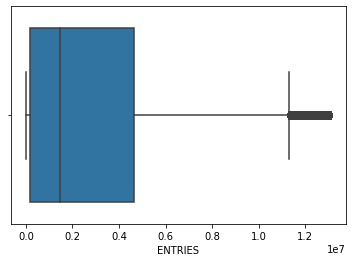

In [31]:
#plotting the boxplot to see anomlies

sns.boxplot(mta_all_files[mta_all_files["ENTRIES"]<=Maximum_entries].ENTRIES)
plt.savefig('BoxplotEntreis.png');

In [32]:
#Max value for existes
Q3= mta_all_files["EXITS"].quantile(q=0.75)
Q1= mta_all_files["EXITS"].quantile(q=0.25)

IQR = Q3-Q1
Maximum_exits = Q3+1.5+IQR

C:\Users\rawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


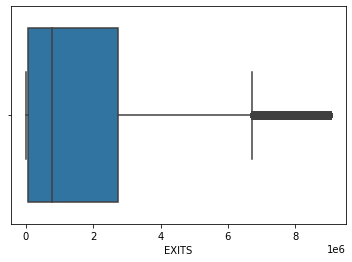

In [33]:

#plotting the boxplot to see anomlies

sns.boxplot(mta_all_files[mta_all_files["EXITS"]<=Maximum_exits].EXITS)
plt.savefig('BoxplotExists.png');

In [34]:
# Fixing the counter for entries

def get_daily_counts_for_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Counter reversed?
        counter = -counter
    if counter > max_counter:
        # Counter reset to 0?
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Still too big?
        return 0
    return counter

In [35]:
# daily entries column

mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts_for_entries, axis=1, max_counter=Maximum_entries)
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/25/2019,2396415,7071844,05/25/2019,7071830.0,2396411.0,14.0
2,A002,R051,02-00-00,59 ST,05/25/2019,2396443,7071864,05/25/2019,7071844.0,2396415.0,20.0
3,A002,R051,02-00-00,59 ST,05/25/2019,2396500,7071943,05/25/2019,7071864.0,2396443.0,79.0
4,A002,R051,02-00-00,59 ST,05/25/2019,2396555,7072182,05/25/2019,7071943.0,2396500.0,239.0
5,A002,R051,02-00-00,59 ST,05/25/2019,2396593,7072456,05/25/2019,7072182.0,2396555.0,274.0


In [36]:
# Fixing the counter for exits

def get_daily_counts_for_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Counter reversed?
        counter = -counter
    if counter > max_counter:
        # Counter reset to 0?
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Still too big?
        return 0
    return counter

In [37]:
# daily exits column

mta_daily["DAILY_EXITS"] = mta_daily.apply(get_daily_counts_for_exits, axis=1, max_counter=Maximum_exits)
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,05/25/2019,2396415,7071844,05/25/2019,7071830.0,2396411.0,14.0,4.0
2,A002,R051,02-00-00,59 ST,05/25/2019,2396443,7071864,05/25/2019,7071844.0,2396415.0,20.0,28.0
3,A002,R051,02-00-00,59 ST,05/25/2019,2396500,7071943,05/25/2019,7071864.0,2396443.0,79.0,57.0
4,A002,R051,02-00-00,59 ST,05/25/2019,2396555,7072182,05/25/2019,7071943.0,2396500.0,239.0,55.0
5,A002,R051,02-00-00,59 ST,05/25/2019,2396593,7072456,05/25/2019,7072182.0,2396555.0,274.0,38.0


# Calculate the traffic:

In [38]:
#adding the traffic

mta_daily['Traffic']= mta_daily.DAILY_ENTRIES + mta_daily.DAILY_EXITS

In [39]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,Traffic
1,A002,R051,02-00-00,59 ST,05/25/2019,2396415,7071844,05/25/2019,7071830.0,2396411.0,14.0,4.0,18.0
2,A002,R051,02-00-00,59 ST,05/25/2019,2396443,7071864,05/25/2019,7071844.0,2396415.0,20.0,28.0,48.0
3,A002,R051,02-00-00,59 ST,05/25/2019,2396500,7071943,05/25/2019,7071864.0,2396443.0,79.0,57.0,136.0
4,A002,R051,02-00-00,59 ST,05/25/2019,2396555,7072182,05/25/2019,7071943.0,2396500.0,239.0,55.0,294.0
5,A002,R051,02-00-00,59 ST,05/25/2019,2396593,7072456,05/25/2019,7072182.0,2396555.0,274.0,38.0,312.0


In [40]:
mta_daily.describe()

,EXITS,ENTRIES,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,Traffic
count,3.239217e+06,3.239217e+06,3.239217e+06,3.239217e+06,3.239217e+06,3.239217e+06,3.239217e+06
mean,3.604090e+07,4.289717e+07,4.289851e+07,3.604050e+07,5.489117e+02,3.951141e+02,9.440258e+02
std,2.028631e+08,2.202177e+08,2.202227e+08,2.028584e+08,3.979661e+04,2.735497e+04,6.108490e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.591040e+05,4.875250e+05,4.876150e+05,2.591800e+05,2.400000e+01,2.000000e+01,6.700000e+01
50%,1.505875e+06,2.556464e+06,2.556547e+06,1.505947e+06,1.000000e+02,7.100000e+01,2.180000e+02
75%,5.043332e+06,7.031822e+06,7.031767e+06,5.043336e+06,2.620000e+02,1.890000e+02,4.910000e+02
max,2.124055e+09,2.129289e+09,2.129289e+09,2.124055e+09,1.244717e+07,8.702864e+06,2.024027e+07


In [41]:
# Dropping the "PREV_ENTRIES","PREV_EXITS Columns. To prevent errors in multiple run of cell, errors on drop is ignored

mta_daily = mta_daily.drop(["PREV_ENTRIES","PREV_EXITS"], axis=1, errors="ignore")
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,DAILY_ENTRIES,DAILY_EXITS,Traffic
1,A002,R051,02-00-00,59 ST,05/25/2019,2396415,7071844,05/25/2019,14.0,4.0,18.0
2,A002,R051,02-00-00,59 ST,05/25/2019,2396443,7071864,05/25/2019,20.0,28.0,48.0
3,A002,R051,02-00-00,59 ST,05/25/2019,2396500,7071943,05/25/2019,79.0,57.0,136.0
4,A002,R051,02-00-00,59 ST,05/25/2019,2396555,7072182,05/25/2019,239.0,55.0,294.0
5,A002,R051,02-00-00,59 ST,05/25/2019,2396593,7072456,05/25/2019,274.0,38.0,312.0


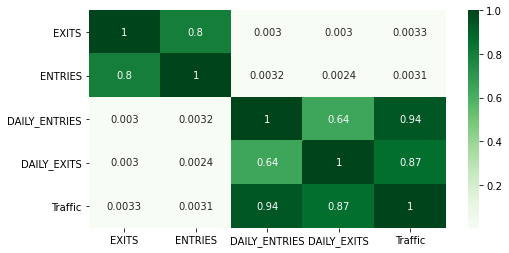

In [42]:
#check for corrlation

plt.figure(figsize=(8,4))
sns.heatmap(mta_daily.corr(),cmap='Greens',annot=True)
plt.savefig('heatmap.png');

# Finding the Traffic by station:

In [43]:
# Come up with daily time series for each STATION, by adding up all the turnstiles in a station.

station_totals = mta_daily.groupby('STATION').sum()\
                        .sort_values('Traffic', ascending=False).reset_index()
station_totals[:15]

,STATION,EXITS,ENTRIES,DAILY_ENTRIES,DAILY_EXITS,Traffic
0,GRD CNTRL-42 ST,2326633025623,1634710706822,94228325.0,39070717.0,133299042.0
1,FULTON ST,2537588628391,3265144291937,50513882.0,49396839.0,99910721.0
2,THIRTY THIRD ST,1596518836,2105965367,54346880.0,40791388.0,95138268.0
3,125 ST,2953117988050,4832786514017,44245659.0,35283134.0,79528793.0
4,CANAL ST,4070367654465,3025725943394,58348685.0,21016402.0,79365087.0
5,EXCHANGE PLACE,1390839763,1450535682,35182891.0,33089739.0,68272630.0
6,14 ST,2230348223408,3058406080865,30748462.0,33488181.0,64236643.0
7,34 ST-PENN STA,3086994156043,2769733118020,29978775.0,29083879.0,59062654.0
8,PAVONIA/NEWPORT,1362616630,1187196492,26385655.0,31052616.0,57438271.0
9,SOUTH FERRY,19091111930,112165099000,27905743.0,25339173.0,53244916.0


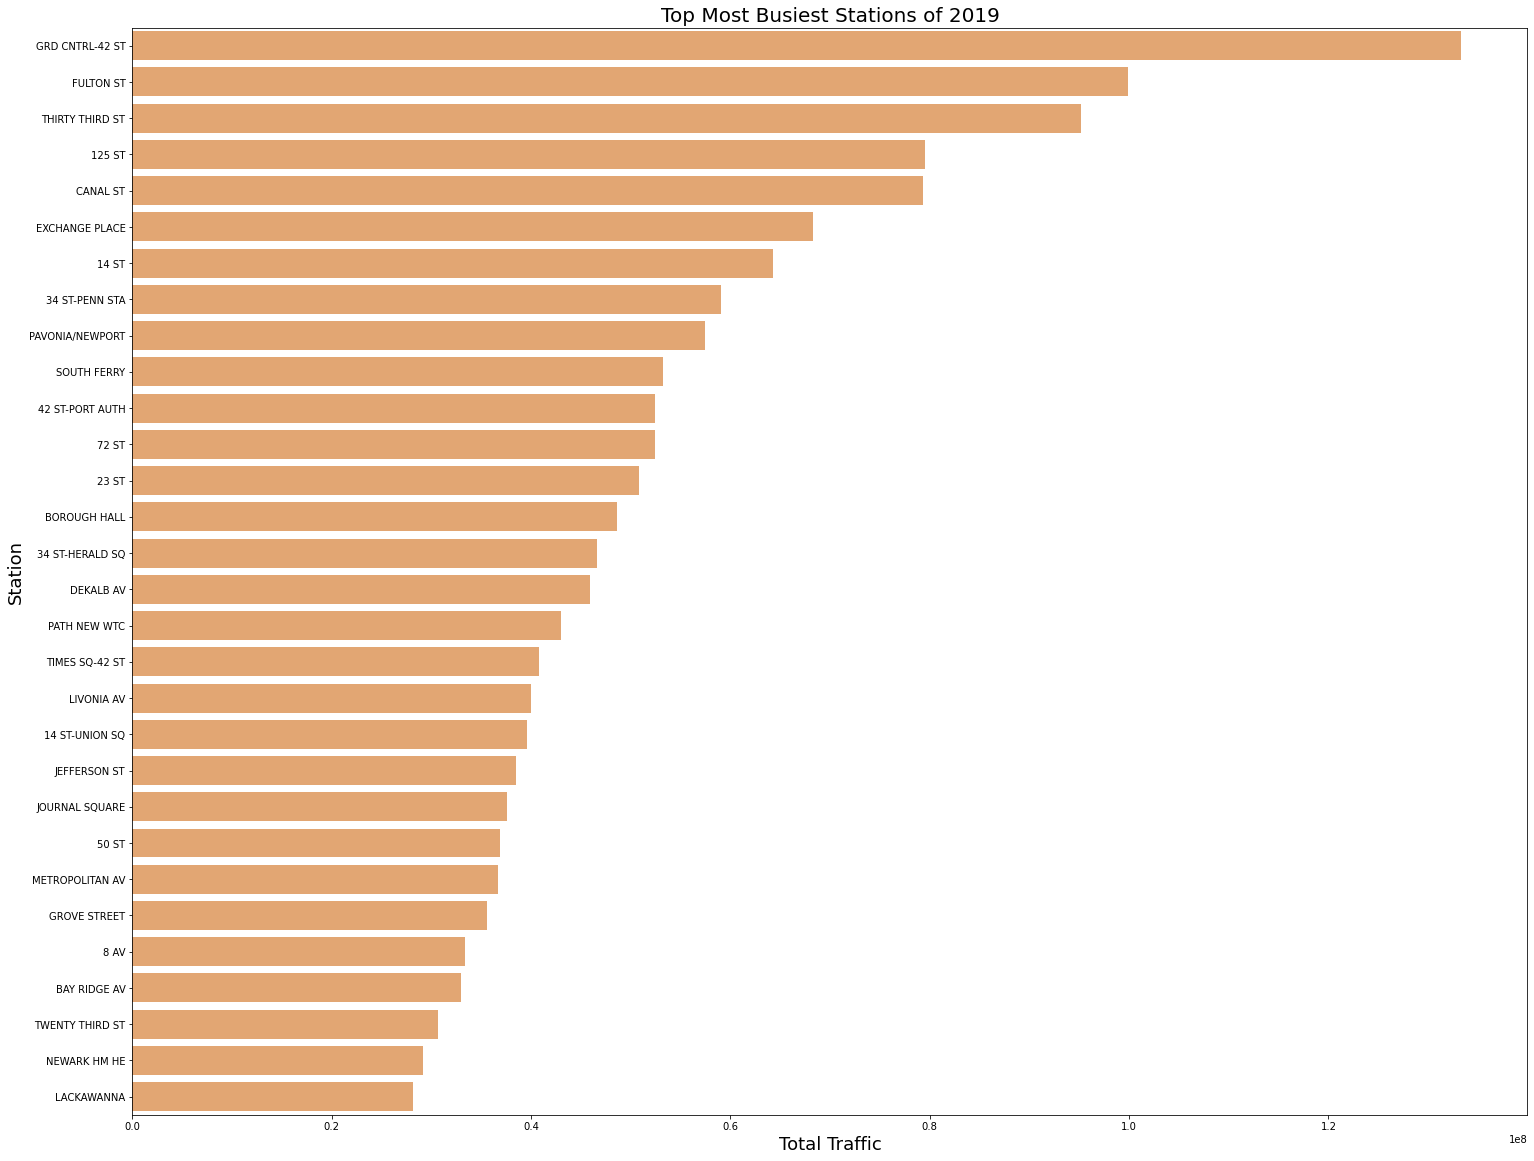

In [44]:
#top traffieced stations in 2019

plt.figure(figsize=[25,20])

sns.barplot(x='Traffic', y='STATION', data=station_totals[:30], color='sandybrown')
plt.title('Top Most Busiest Stations of 2019', fontsize=20)
plt.xlabel('Total Traffic', fontsize=18)
plt.ylabel('Station', fontsize=18);
plt.savefig('Top statios.png');

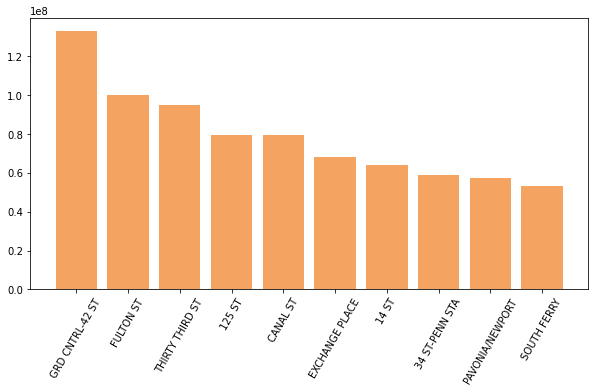

In [45]:
#Top ten statios

plt.figure(figsize=(10,5))
plt.bar(x=station_totals['STATION'][:10], height=station_totals['Traffic'][:10],  color="sandybrown")# top ten 
plt.xticks(rotation=60)
plt.savefig('Top ten statios.png');

In [46]:
#the traffic for ta single turnstile (59 st station)

single_turnstile = mta_daily[(mta_daily["C/A"] == "A002") & 
(mta_daily["UNIT"] == "R051") & 
(mta_daily["SCP"] == "02-00-00") & 
(mta_daily["STATION"] == "59 ST")]

single_turnstile.head()


,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,DAILY_ENTRIES,DAILY_EXITS,Traffic
1,A002,R051,02-00-00,59 ST,05/25/2019,2396415,7071844,05/25/2019,14.0,4.0,18.0
2,A002,R051,02-00-00,59 ST,05/25/2019,2396443,7071864,05/25/2019,20.0,28.0,48.0
3,A002,R051,02-00-00,59 ST,05/25/2019,2396500,7071943,05/25/2019,79.0,57.0,136.0
4,A002,R051,02-00-00,59 ST,05/25/2019,2396555,7072182,05/25/2019,239.0,55.0,294.0
5,A002,R051,02-00-00,59 ST,05/25/2019,2396593,7072456,05/25/2019,274.0,38.0,312.0


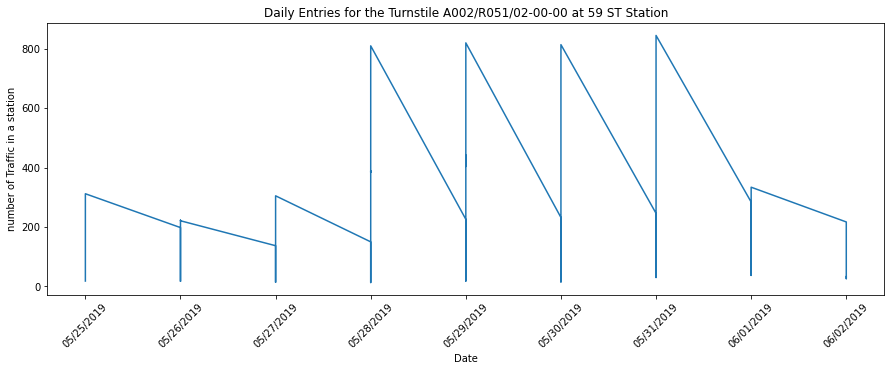

In [47]:
#ploting that single turnstile

plt.figure(figsize=(15,5))
plt.plot(single_turnstile['DATE'][:50], single_turnstile['Traffic'][:50])#size50
plt.ylabel('number of Traffic in a station')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for the Turnstile A002/R051/02-00-00 at 59 ST Station')
plt.savefig('Daily Entries for the Turnstile.png');

In [68]:
# week of column

mta_daily['WEEK_DAY'] = pd.to_datetime(mta_daily['DATE']).dt.dayofweek

mta_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,DAILY_ENTRIES,DAILY_EXITS,Traffic,WEEK_DAY
3244165,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2019,420,5554,09/22/2019,0.0,0.0,0.0,0
3244166,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/24/2019,420,5554,09/23/2019,0.0,0.0,0.0,1
3244167,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/25/2019,420,5554,09/24/2019,0.0,0.0,0.0,2
3244168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/26/2019,420,5554,09/25/2019,0.0,0.0,0.0,3
3244169,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/27/2019,420,5554,09/26/2019,0.0,0.0,0.0,4


In [69]:
#Get entries by a week

def get_week_list(input_frame, column_name, num_days):
   
    window = 1   # starts at 1 because first day 0 is in second row
    week_list = []
    while window < len(input_frame)-num_days:  
        week_list.append(input_frame[column_name][window:window+num_days])  
        window+=num_days
    return week_list

In [70]:
#caling the get_week_list
input_frame = mta_daily[mta_daily['STATION'] == 'RIT-ROOSEVELT']
column_name = 'DAILY_ENTRIES'
num_days = 7

get_week_list(input_frame, column_name, num_days)

[3241375     49.0
 3241376    454.0
 3241377    638.0
 3241378    520.0
 3241379    149.0
 3241380    409.0
 3241381    510.0
 Name: DAILY_ENTRIES, dtype: float64,
 3241382    410.0
 3241383     91.0
 3241384      4.0
 3241385     43.0
 3241386    419.0
 3241387    665.0
 3241388    476.0
 Name: DAILY_ENTRIES, dtype: float64,
 3241389    129.0
 3241390      2.0
 3241391    323.0
 3241392    294.0
 3241393    214.0
 3241394    210.0
 3241395     33.0
 Name: DAILY_ENTRIES, dtype: float64,
 3241396    305.0
 3241397    381.0
 3241398    264.0
 3241399    118.0
 3241400     50.0
 3241401    332.0
 3241402    435.0
 Name: DAILY_ENTRIES, dtype: float64,
 3241403    365.0
 3241404    150.0
 3241405     29.0
 3241406     93.0
 3241407    234.0
 3241408    373.0
 3241409    402.0
 Name: DAILY_ENTRIES, dtype: float64,
 3241410    293.0
 3241411    132.0
 3241412      8.0
 3241413     59.0
 3241414    434.0
 3241415    748.0
 3241416    603.0
 Name: DAILY_ENTRIES, dtype: float64,
 3241417    149.

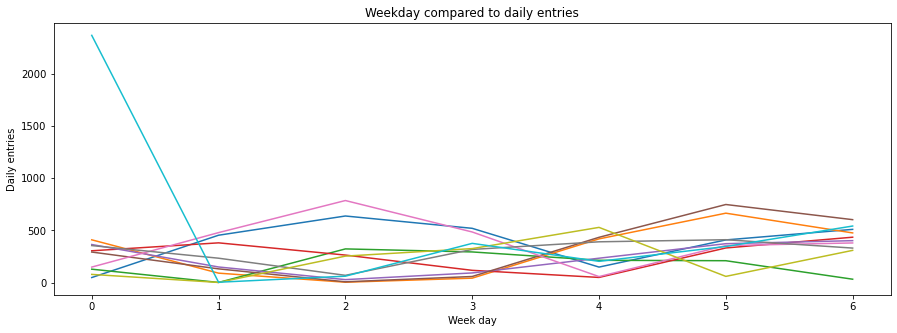

In [71]:
#plot for
x= np.arange(7)
weeks = get_week_list(input_frame, column_name, num_days)
plt.figure(figsize = (15, 5))
plt.xlabel('Week day')
plt.ylabel('Daily entries')
plt.title('Weekday compared to daily entries')
for i in weeks[:10]:   # plotting 10 weeks for a station RIT-ROOSEVELT
    plt.plot(x, i);

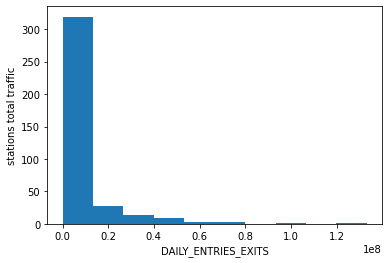

In [47]:
#histogram for the station totals

plt.hist(station_totals['Traffic'])
plt.xticks();
plt.xlabel("DAILY_ENTRIES_EXITS")
plt.ylabel("stations total traffic")
plt.savefig('hist.png');

In [48]:
#Top ten stations
stations_top10 = (mta_daily.groupby(['STATION'])['Traffic'].sum()
                   .reset_index()
                   .sort_values(by='Traffic',ascending=False) 
                   .STATION.head(10))
stations_top10

232    GRD CNTRL-42 ST
225          FULTON ST
351    THIRTY THIRD ST
9               125 ST
172           CANAL ST
212     EXCHANGE PLACE
13               14 ST
61      34 ST-PENN STA
316    PAVONIA/NEWPORT
340        SOUTH FERRY
Name: STATION, dtype: object

In [49]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,ENTRIES,PREV_DATE,DAILY_ENTRIES,DAILY_EXITS,Traffic
1,A002,R051,02-00-00,59 ST,05/25/2019,2396415,7071844,05/25/2019,14.0,4.0,18.0
2,A002,R051,02-00-00,59 ST,05/25/2019,2396443,7071864,05/25/2019,20.0,28.0,48.0
3,A002,R051,02-00-00,59 ST,05/25/2019,2396500,7071943,05/25/2019,79.0,57.0,136.0
4,A002,R051,02-00-00,59 ST,05/25/2019,2396555,7072182,05/25/2019,239.0,55.0,294.0
5,A002,R051,02-00-00,59 ST,05/25/2019,2396593,7072456,05/25/2019,274.0,38.0,312.0


Loading the wealthiest neighborhoods dataset:

In [50]:
#station by neighborhood load data

stationsBydistrect=pd.read_csv('C:/Users/rawan/Desktop/MyProject1/StationsbyNeighborhood.csv')

In [51]:
stationsBydistrect.head()

,NEIGHBORHOOD,MAP NAME,MTA DATA SET IDENTIFIER
0,Upper East Side,86 ST-2 AVE 456,86 ST-2 AVE
1,Upper East Side,96 ST-2 AVE 456,96 ST-2 AVE
2,Upper East Side,96 ST Q,96 ST
3,Upper East Side,77 St,77 ST
4,Upper East Side,72 St,72 ST


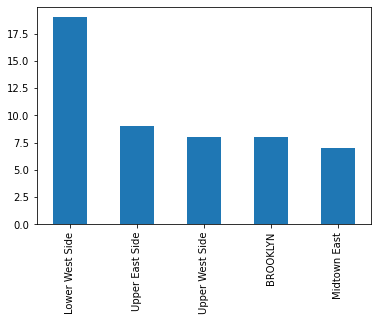

In [86]:
#NEIGHBORHOOD with the most number of metro stations

stationsBydistrect['NEIGHBORHOOD'].value_counts().plot(kind='bar')
plt.savefig('NEIGHBORHOOD with the most number of metro stations.png');

In [53]:
#Matching the stations names in both datasetes

def get_station_name(row, col_name, station_names, check_length = False):
   
    row_name = row[col_name]
    row_name = re.sub('th', '', row_name)
    row_name = re.sub('rd', '', row_name)
    row_name = re.sub('nd', '', row_name)
    row_name = re.sub('-', '', row_name).upper()
    similarity = 0
    similar_name = ''
    for name in station_names:
        if check_length:
            if len(name) < 14:
                name += "".join(['-' for i in range(len(name), 14)])
        ratio = SequenceMatcher(None, row_name, name).ratio()
        if ratio > similarity:
            similarity = ratio
            similar_name = name.strip('-')
    return similar_name

In [54]:
stationsBydistrect['MTA_name'] = stationsBydistrect.apply(get_station_name, axis = 1, col_name = "MAP NAME", \
                                        station_names = mta_daily['STATION'].unique())

In [55]:
stationsBydistrect.head()

,NEIGHBORHOOD,MAP NAME,MTA DATA SET IDENTIFIER,MTA_name
0,Upper East Side,86 ST-2 AVE 456,86 ST-2 AVE,86 ST-2 AVE
1,Upper East Side,96 ST-2 AVE 456,96 ST-2 AVE,96 ST-2 AVE
2,Upper East Side,96 ST Q,96 ST,96 ST
3,Upper East Side,77 St,77 ST,77 ST
4,Upper East Side,72 St,72 ST,72 ST


In [70]:
#Top 10 stations in wealthie NEIGHBORHOOD 
#take the stations in wealthiest distrect and get top ten 

stationsBydistrect_list = stationsBydistrect['MTA_name']

stationsBydistrect_stations =mta_daily[mta_daily['STATION'].isin(stationsBydistrect_list)].sort_values(by = 'Traffic', ascending = False)

stationsBydistrect_top10 = \
    (stationsBydistrect_stations.groupby(['STATION'])['Traffic'].sum()
                   .reset_index()
                   .sort_values(by='Traffic',ascending=False) 
                   .STATION.head(10))

In [71]:
stationsBydistrect_top10.head(30)

31    GRD CNTRL-42 ST
23           CANAL ST
1               14 ST
12              72 ST
3               23 ST
21       BOROUGH HALL
2      14 ST-UNION SQ
27     CHRISTOPHER ST
26        CHAMBERS ST
9      59 ST COLUMBUS
Name: STATION, dtype: object

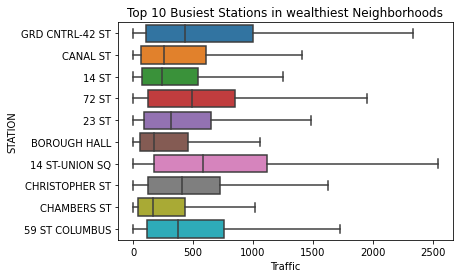

In [87]:
#a box plot showing the top 10 busiest stations in wealthiest neighborhoods
sns.boxplot(x='Traffic', y='STATION', \
            data=stationsBydistrect_stations[stationsBydistrect_stations['STATION'].isin(stationsBydistrect_top10)], \
            order = stationsBydistrect_top10, showfliers = False).set_title('Top 10 Busiest Stations in wealthiest Neighborhoods')
plt.savefig('Top 10 Busiest Stations in wealthiest NeighborhoodsBoxplot.png');